In [ ]:
from bs4 import BeautifulSoup
from time import sleep
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd

In [ ]:
service = Service('chromedriver.exe')
browser = Chrome(service = service)
url = 'https://ruscorpora.ru/'
browser.get(url)
sleep(2)

In [ ]:
key_words = ['игла' , 'пара', 'каток', 'лист', 'сетка', 'кора', 'точка', 'кость', 'свет', 'чаша']
data = {}

In [ ]:
for word in key_words:
    data[word] = []
    input_row = browser.find_element(By.XPATH, '//*[@id="main"]/div/div/div[1]/div[2]/form/div/div[1]/input')
    input_row.send_keys(word)
    browser.find_element(By.XPATH, '//*[@id="main"]/div/div/div[1]/div[2]/form/div/div[2]/input').click()
    sleep(2)
    browser.find_element(By.XPATH, '//*[@id="main"]/div[3]/div/div/div[3]/div/div[3]/a[1]').click()
    sleep(2)
    browser.find_element(By.XPATH, '//*[@id="main"]/div/div[2]/div/div/div/div[1]/div/nav/ul/li[2]/button').click()
    sleep(3)

    for page in range(1,21):
        soup = BeautifulSoup(browser.page_source)
        sequences = soup.findAll('tr', class_ = 'snippet')
        for seq in sequences:
            data[word].append(seq.text.replace('\n\n\n\n\n\n\n\n\n\n\n\n\n', ''))
    
        browser.find_element(By.CSS_SELECTOR, '#main > div > div.results-page > div > div:nth-child(2) > div > div > div > div > div.col-12.col-md-8.col-lg-7 > div > ul > li.ant-pagination-next > button').click()
        sleep(3)

    browser.find_element(By.XPATH, '//*[@id="__nuxt"]/div[2]/header/div/div/a').click()
    sleep(3)

browser.quit()

In [ ]:
for word in key_words:
    print(len(data[word]))

In [ ]:
df = pd.DataFrame(data)
df.to_csv('data.csv')

In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from pymorphy3 import MorphAnalyzer

from collections import Counter, defaultdict
from itertools import combinations
from wordcloud import WordCloud

from scipy.stats import chi2_contingency

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
import graphviz

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lera.lositskayabk.ru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lera.lositskayabk.ru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/lera.lositskayabk.ru/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
df = pd.read_csv('data.csv').drop(columns = ['Unnamed: 0'])
df.head(3)

,игла,пара,каток,лист,сетка,кора,точка,кость,свет,чаша
0,"и клали в них сломанные иглы, пустые тюрички (...",Могу дать пару советов.,"принято, поэтому не улица, а каток!",Порционно выкладываем на лист салата.,перпендикулярной осям цепочек плоскости регуля...,У нас в коре головного мозга есть три независимых,когда нужно было оставаться только «точкой» ум...,"Вам этот Прохоров, прямо как кость в горле!","пене морей, / Всех чудес на свете милей /Ты — ...",круг постепенно начнет приобретать форму чаши.
1,"голове, будто подушечка, утыканная швейными иг...","На пары ходить, лекции перечитывать, готовиться к","Тяжелый ящик, установленный на одинаковых катк...",Перечислить всех просто не хватит листа.,График бережно приводит в порядок сетки и пакеты.,"родингитизированных даек, собственно родингито...","пространстве, я стала именно такой «точкой умн...",не будет легко отделяться от костей.,"тем, кто уже ездил по свету, общался с людьми,...",разногласия и мелкие стычки переполняют чашу т...
2,этих несчастных заразилось через героиновую иглу.,"А еще ходить на пары все, и если можно понять",В воскресенье на олимпийском катке в Хамаре (Н...,Сверху положить листья эстрагона и зеленый лук.,"и армирование газона, уложив пластиковую сетку...","не облезлые бревна с содранной корой, — заботл...",нужно понять и принять свою точку зрения.,На дно кастрюли положить рубленные кости и вин...,понятно что [в] не правильном свете видят ее о...,чтобы жизнь новобрачных была полной чашей; под...


In [3]:
stopwords = stopwords.words('russian')
morph = MorphAnalyzer()

In [4]:
custom_stopwords = ['который', 'это', 'ещё', 'очень', 'свой', 'стать', 'весь', 'каждый', 'мочь', 'всё', 'попасть', 'оказаться', 'ходить', 
                    'поставить', 'положить', 'сторона', 'вместо', 'должный', 'любой', 'некоторый', 'остаться', 'большой', 'появиться', 'самый',
                   'лишь', 'назад', 'эт', 'видеть', 'правда', 'найти', 'прямо', 'спросить', 'наш', 'ран', 'например', 'первый', 'оно', 'также',
                   'возле', 'словно', 'просто', 'именно', 'каткий', 're', 'пзрк', 'несколько', 'среда', 'сказать', 'иметь', 'сегодня',
                   'написать', 'тридцать', 'сто', 'склоняться', 'переполняться', 'переполнять', 'мухин', 'версия']
stopwords += custom_stopwords

In [5]:
def preprocessing(text):
    tokens = word_tokenize(text.lower())
    lemmas = []
    for token in tokens:
        if token.isalpha() and len(token) > 1:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stopwords:
                lemmas.append(lemma)
    return lemmas

In [6]:
def get_counters_and_pre_data(df):
    single_counters = {}
    pair_counters = {}
    bigram_counters = {}
    first_word_counters = {}
    second_word_counters = {}
    preprocessing_data = {}
    key_words = df.columns
    
    for key_word in key_words:
        single_counter = Counter()
        pair_counter = Counter()
        bigram_counter = Counter()
        first_word_counter = defaultdict(int)
        second_word_counter = defaultdict(int)
    
        preprocessing_data[key_word] = df[key_word].apply(preprocessing)
    
        for seq in preprocessing_data[key_word]:
            single_counter.update(seq)
            bigram_counter.update(list(ngrams(seq, 2)))
            
            pairs = combinations([word for word in seq if word != key_word], 2)
            for pair in pairs:
                pair_counter[pair] += 1
                first_word, second_word = pair
                first_word_counter[first_word] += 1
                second_word_counter[second_word] += 1
            
        single_counters[key_word] = single_counter
        pair_counters[key_word] = pair_counter
        bigram_counters[key_word] = bigram_counter
        first_word_counters[key_word] = first_word_counter
        second_word_counters[key_word] = second_word_counter
    return single_counters, pair_counters, bigram_counters, first_word_counters, second_word_counters, preprocessing_data

In [7]:
single_counters, pair_counters, bigram_counters, first_word_counters, second_word_counters, preprocessing_data = get_counters_and_pre_data(df)
preprocessing_df = pd.DataFrame(preprocessing_data)
preprocessing_df.head(3)

,игла,пара,каток,лист,сетка,кора,точка,кость,свет,чаша
0,"[класть, сломать, игла, пустой, тюричка, выпра...","[дать, пара, совет]","[принять, поэтому, улица, каток]","[порционный, выкладывать, лист, салат]","[перпендикулярный, ось, цепочка, плоскость, ре...","[кора, головной, мозг, независимый]","[нужно, оставаться, точка, умный, присутствие,...","[прохоров, кость, горло]","[пена, море, чудо, свет, миля, убежище, мука]","[круг, постепенно, начать, приобретать, форма,..."
1,"[голова, подушечка, утыкать, швейный, игла]","[пара, лекция, перечитывать, готовиться]","[тяжёлый, ящик, установленный, одинаковый, кат...","[перечислить, хватить, лист]","[график, бережно, приводить, порядок, сетка, п...","[родингитизировать, дайка, собственно, родинги...","[пространство, точка, умный, присутствие]","[легко, отделяться, кость]","[ездить, свет, общаться, человек]","[разногласие, мелкий, стычка, чаша, терпение]"
2,"[несчастный, заразиться, героиновый, игла]","[пара, понять]","[воскресение, олимпийский, каток, хамар, норве...","[сверху, лист, эстрагон, зелёный, лук]","[армирование, газон, уложить, пластиковый, сет...","[облезлый, бревно, содрать, кора, заботливо, у...","[нужно, понять, принять, точка, зрение]","[дно, кастрюля, рубить, кость, виноградный, лист]","[понятно, правильный, свет]","[жизнь, новобрачный, полный, чаша, подруга, не..."


In [8]:
def create_graphviz(data, key_word, meaning, fmt = 'pair'):
    df = pd.DataFrame(data, columns = ['Source', 'Target', 'weight'])
    G = nx.Graph()
    G.add_weighted_edges_from(df.values)

    dot = graphviz.Digraph(engine='sfdp')
    dot.attr(dpi='300')
    dot.attr('node', fontsize='30', fontname='Arial', fontweight='bold')
    dot.attr('edge', fontsize='28', fontname='Arial', fontweight='bold')

    for node in G.nodes():
        dot.node(node, shape='circle', style='filled', fillcolor='lightblue')

    for source, target, weight in df.itertuples(index=False, name=None):
        dot.edge(source, target, color='violet', label=str(weight))

    dot.render(f'{key_word}_{meaning}_{fmt}', format = 'png', view = False)

In [9]:
def get_graphviz(counters, counter_type, meaning = ''):
    data = {}
    for key_word, counter in counters.items():
        data[key_word] = []
        for pair, count in counter.most_common(20):
            data[key_word].append((pair[0], pair[1], count))
        create_graphviz(data[key_word], key_word, meaning, counter_type)

In [10]:
get_graphviz(pair_counters, 'pair')
get_graphviz(bigram_counters, 'bigram')

In [11]:
def get_count_df(single_counters):
    data = {}
    for key_word, counter in single_counters.items():
        top_21 = counter.most_common(21)
        data[key_word] = [f'{word}, {count}' for word, count in top_21]
    
    df_single_count = pd.DataFrame(data)
    df_single_count = df_single_count[1:]
    return df_single_count

In [12]:
df_single_count = get_count_df(single_counters)
df_single_count.head()

,игла,пара,каток,лист,сетка,кора,точка,кость,свет,чаша
1,"шприц, 26","год, 32","асфальтовый, 18","бумага, 64","панцирный, 19","земной, 151","зрение, 326","слоновый, 28","человек, 13","вес, 61"
2,"тонкий, 21","день, 24","лёд, 15","дерево, 23","металлический, 17","дерево, 49","новый, 12","кожа, 22","год, 13","серебряный, 23"
3,"рука, 18","месяц, 17","зимой, 13","перец, 17","ворота, 16","мозг, 44","человек, 10","череп, 21","тьма, 13","терпение, 22"
4,"сидеть, 18","час, 16","заливать, 13","лавровый, 17","мяч, 14","головной, 38","горячий, 9","мясо, 16","гореть, 12","вода, 21"
5,"яйцо, 17","слово, 16","пойти, 12","жёлтый, 16","железный, 13","древесный, 23","являться, 9","человек, 14","новый, 11","вино, 21"


In [13]:
def print_bars(df_single_count):
    key_words = df_single_count.columns
    n_col = len(key_words)
    fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(15, 35))
    ax = ax.flatten()
    
    for idx, key_word in enumerate(key_words):
        words = []
        counts = []
        for cell in df_single_count[key_word]:
            word, count = cell.split(',')
            words.append(word)
            counts.append(int(count))
    
        ax[idx].bar(words, counts, edgecolor = 'black')
        ax[idx].set_title(f'Столбчатая диаграмма по ключу "{key_word}"')
        ax[idx].set_ylabel('Частота')
        ax[idx].tick_params(axis = 'x', rotation = 90)
    plt.tight_layout()
    plt.show()

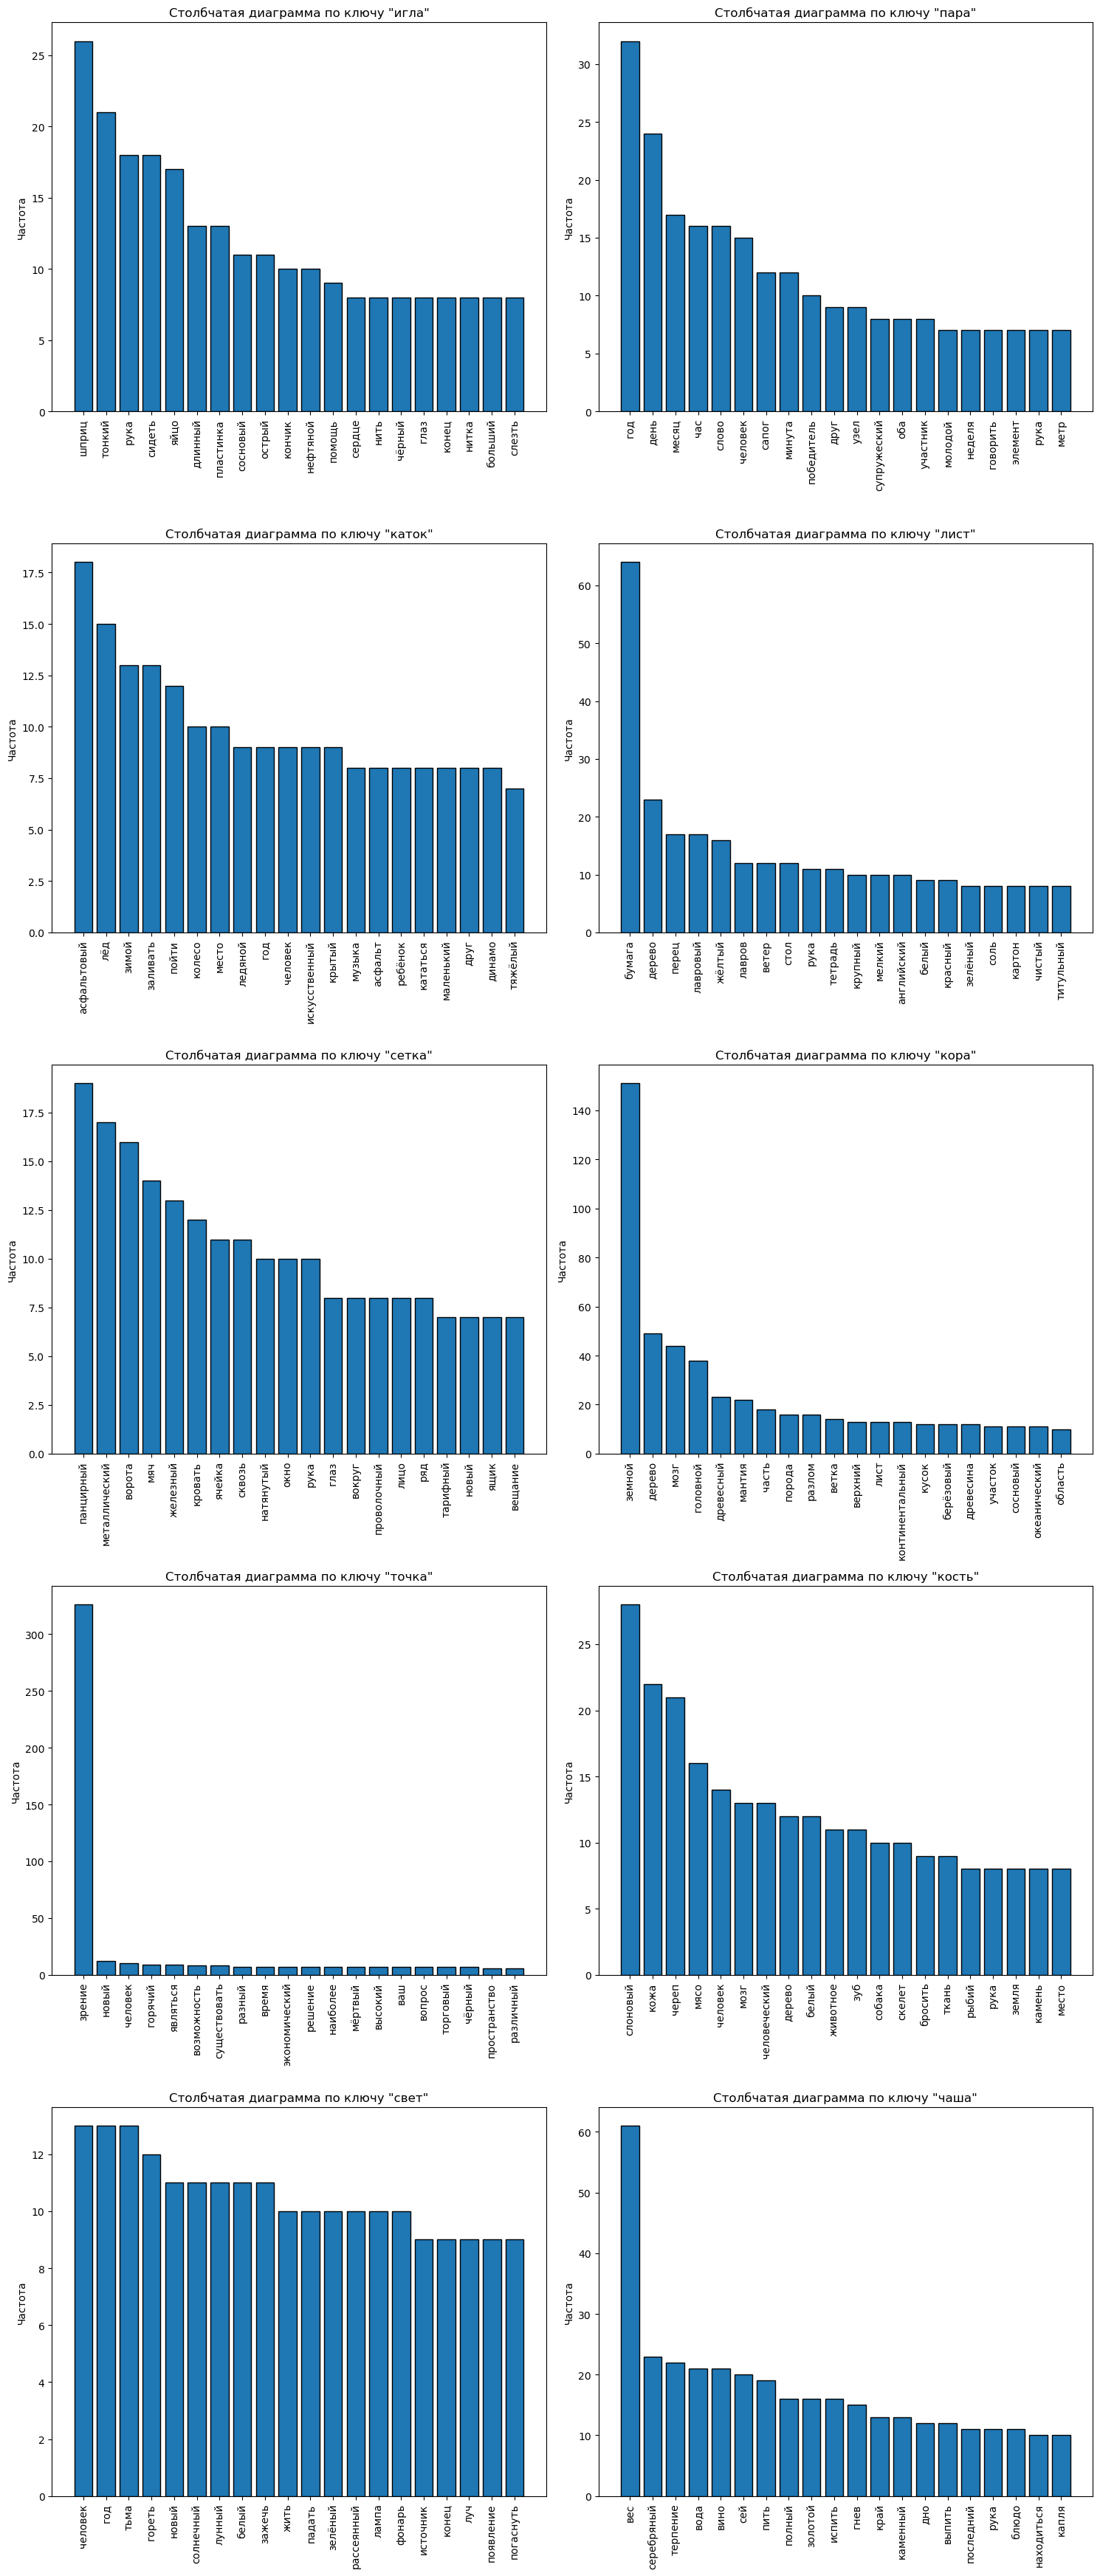

In [14]:
print_bars(df_single_count)

In [15]:
def print_wordClouds(single_counters):
    for key_word, counter in single_counters.items():
        wc = WordCloud(width = 1500, height = 750, background_color = 'white', min_font_size = 50).generate_from_frequencies(counter)
    
        plt.figure(figsize = (18,9))
        plt.imshow(wc)
        plt.title(f'Облако слов для ключа "{key_word}"')
        plt.axis('off')
        
        plt.savefig(f'wordcloud_{key_word}.png', format='png')
        plt.show()

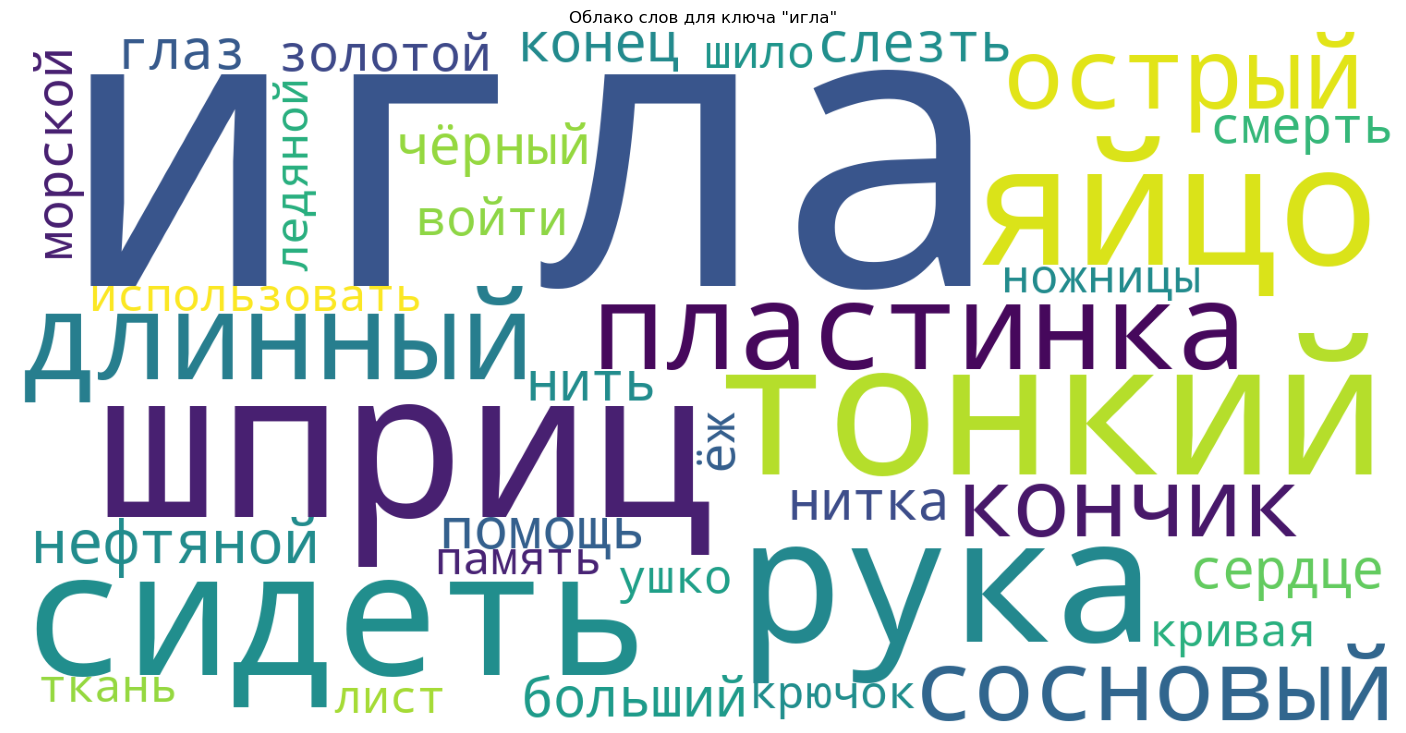

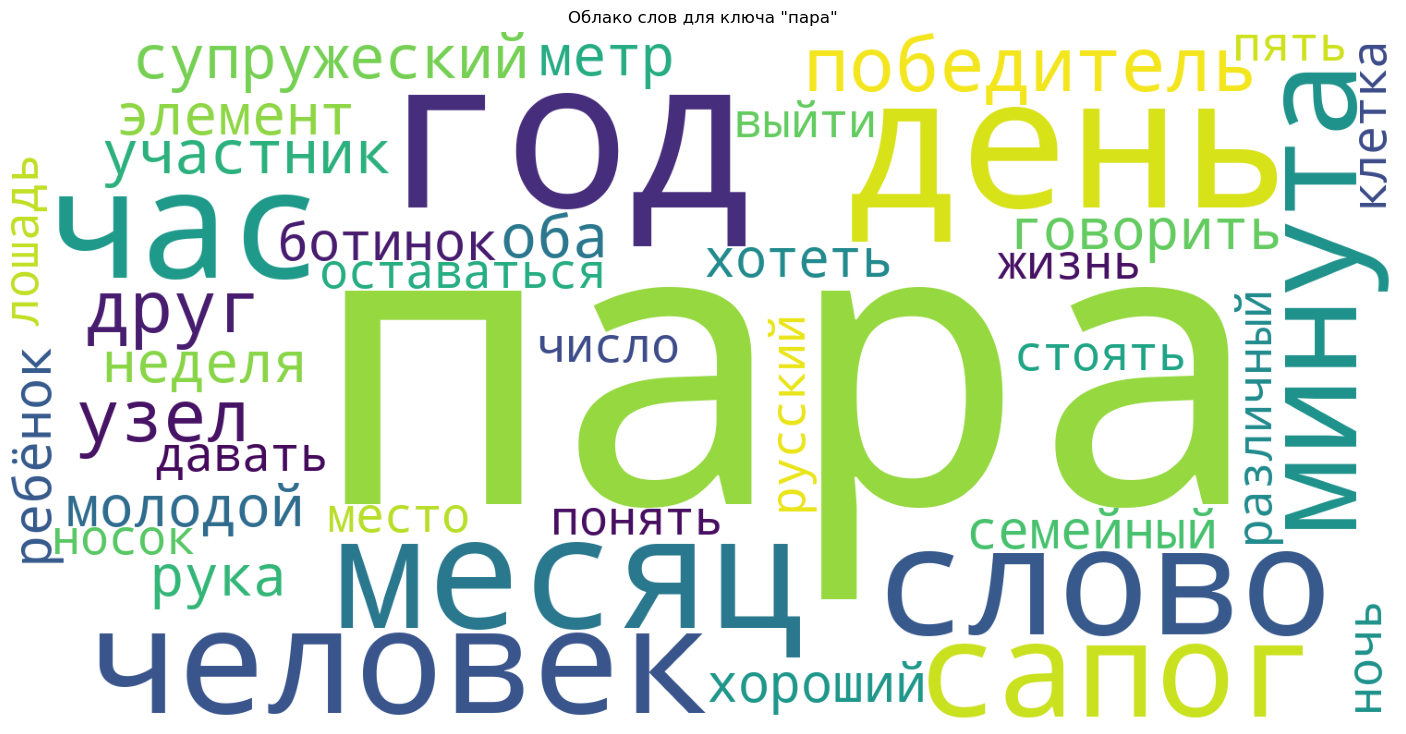

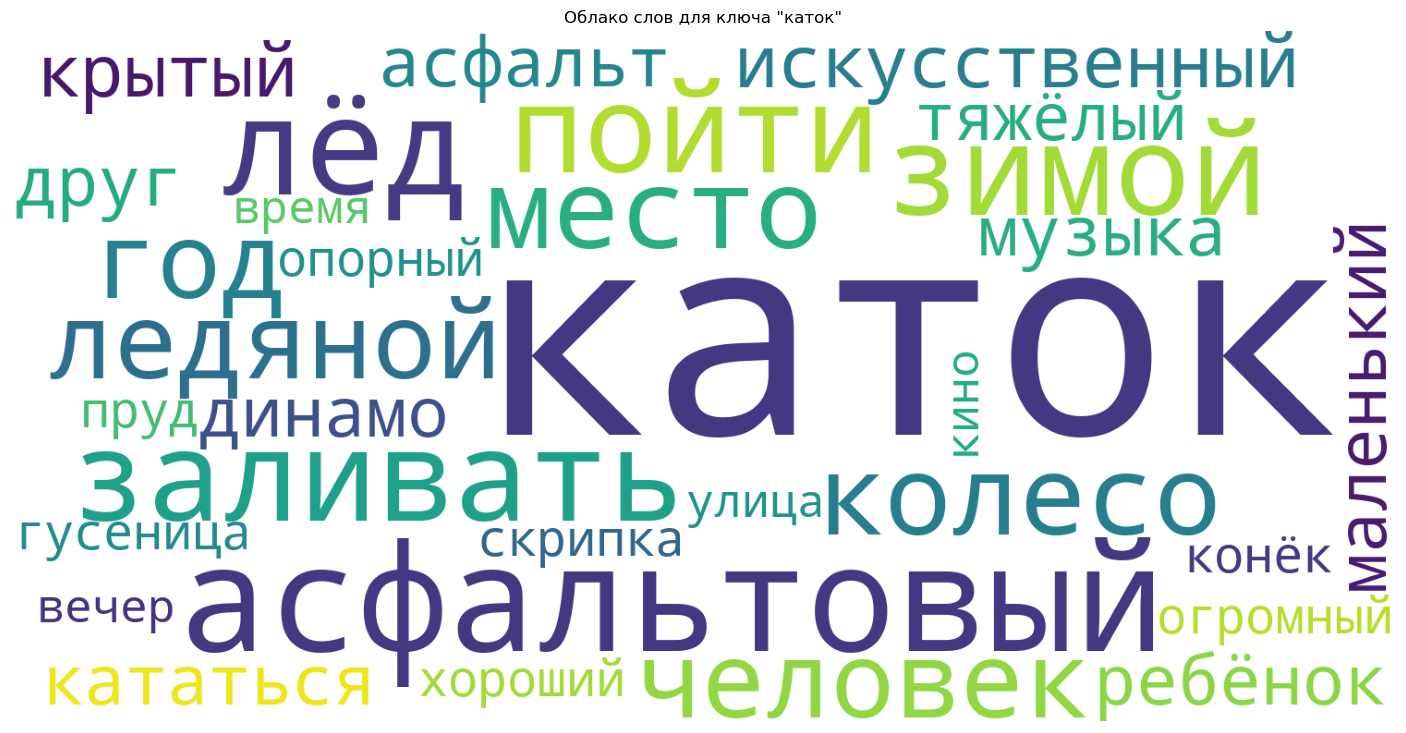

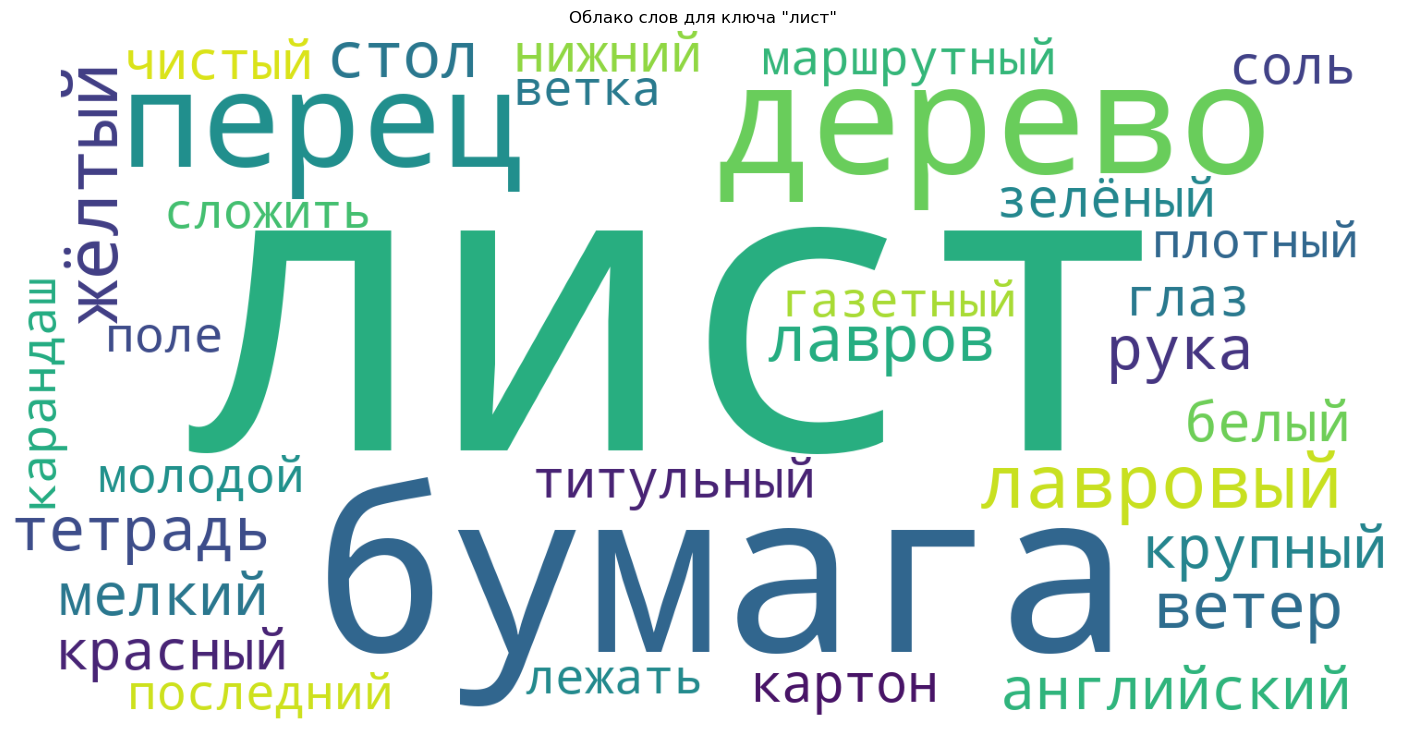

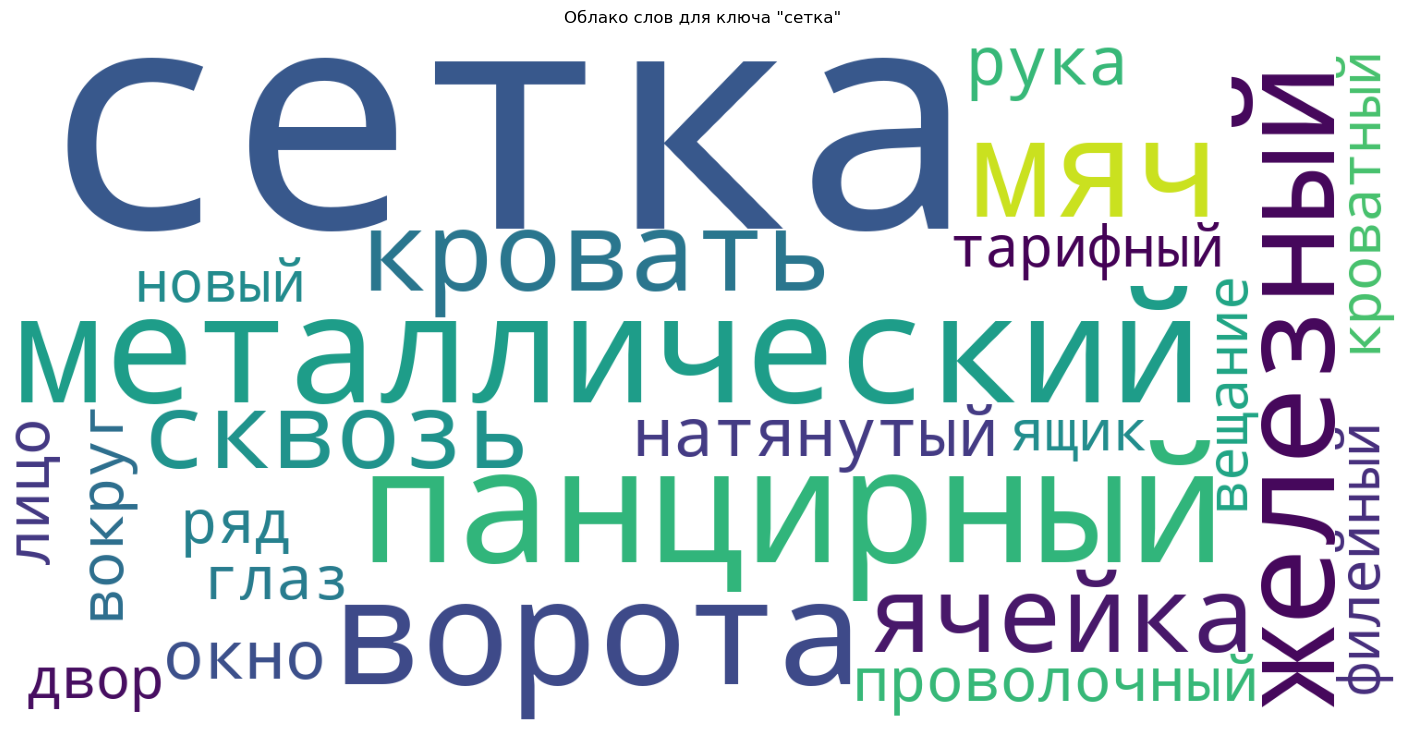

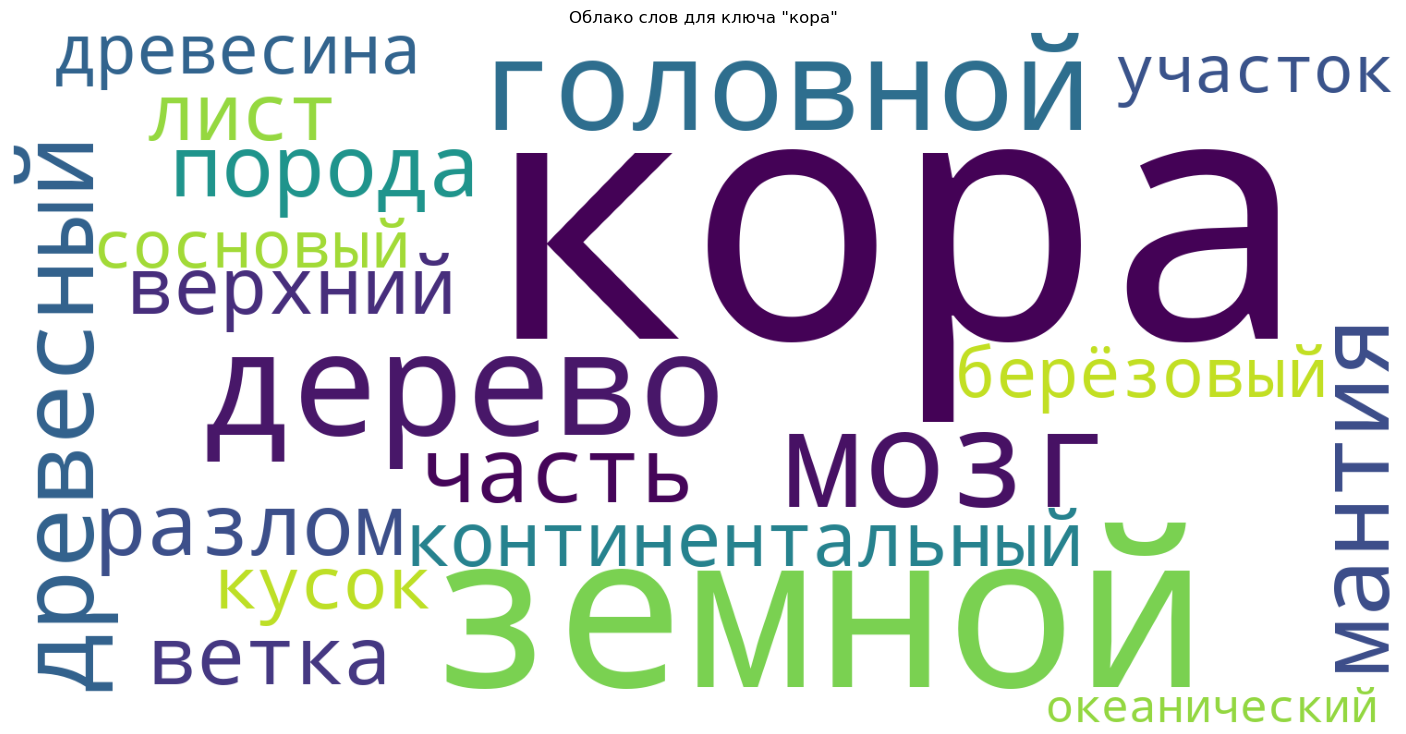

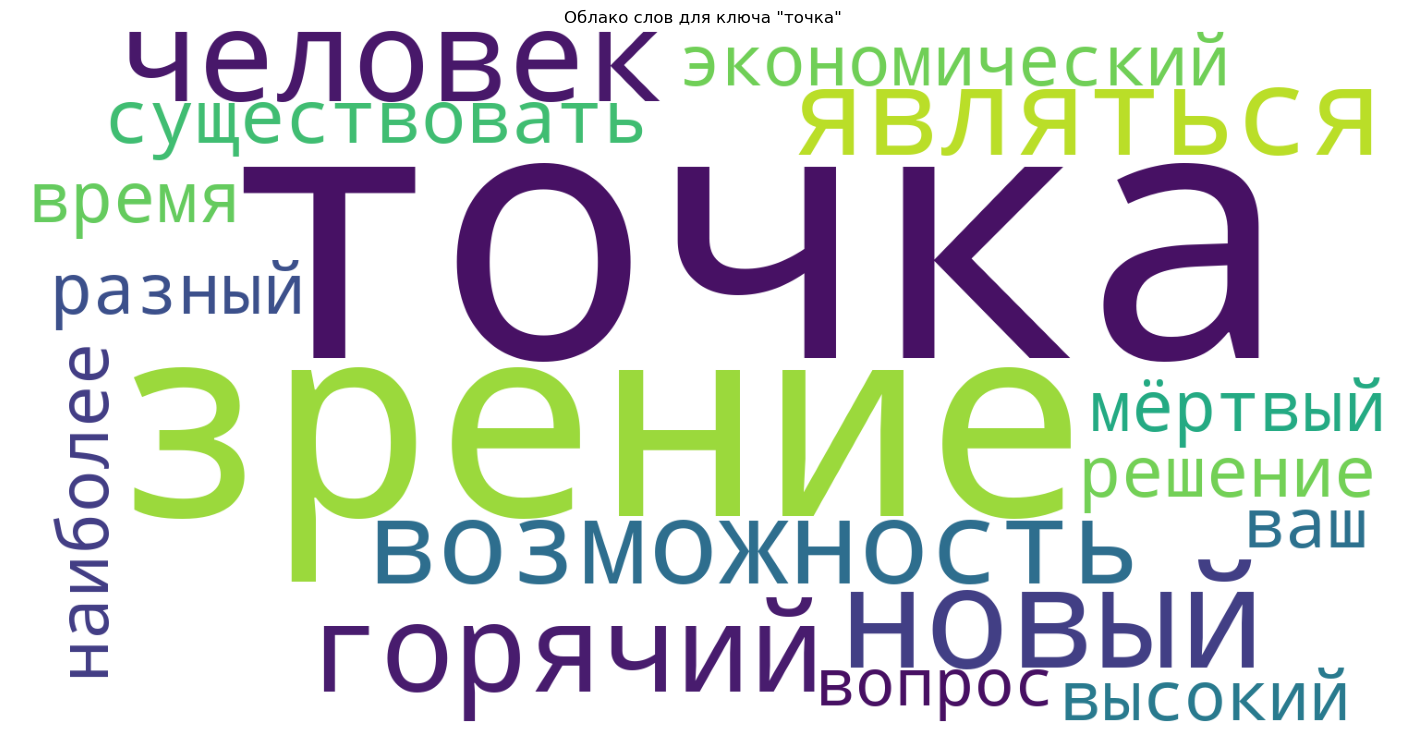

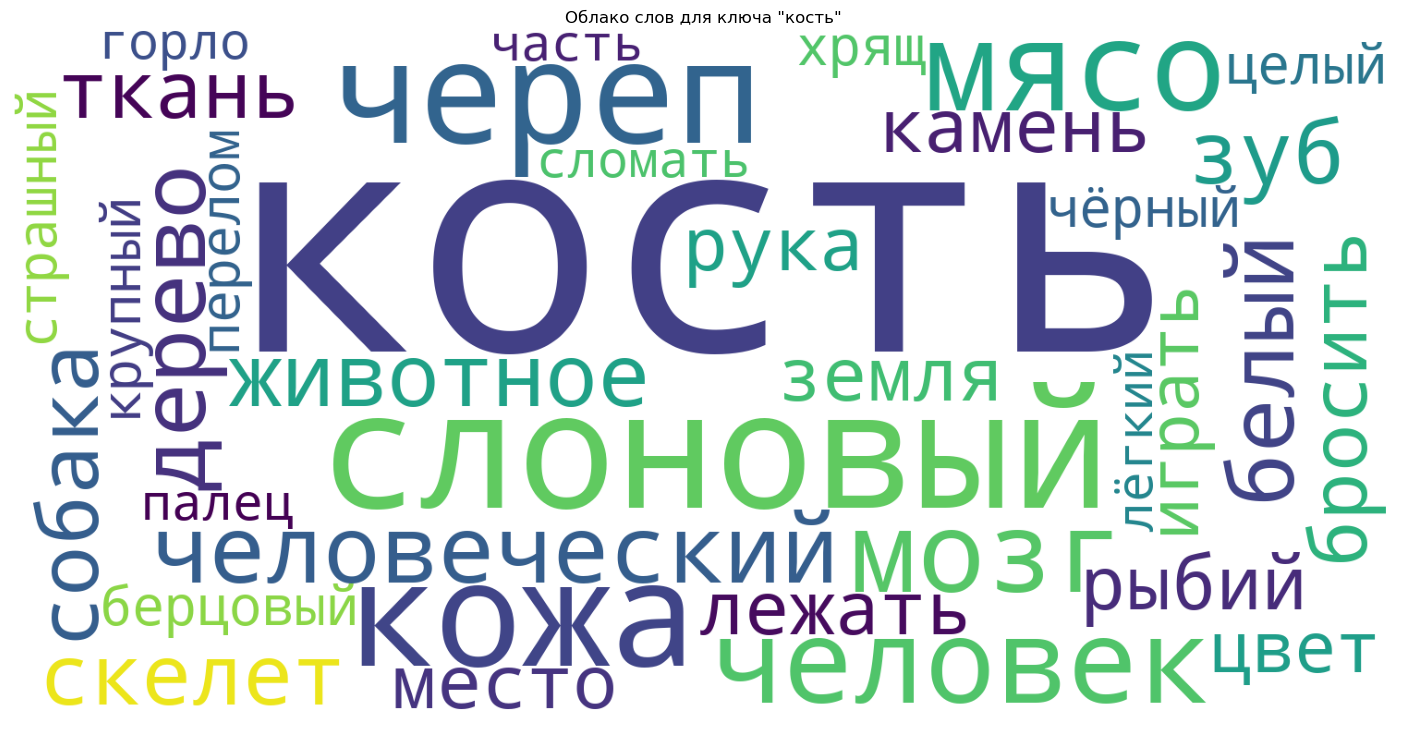

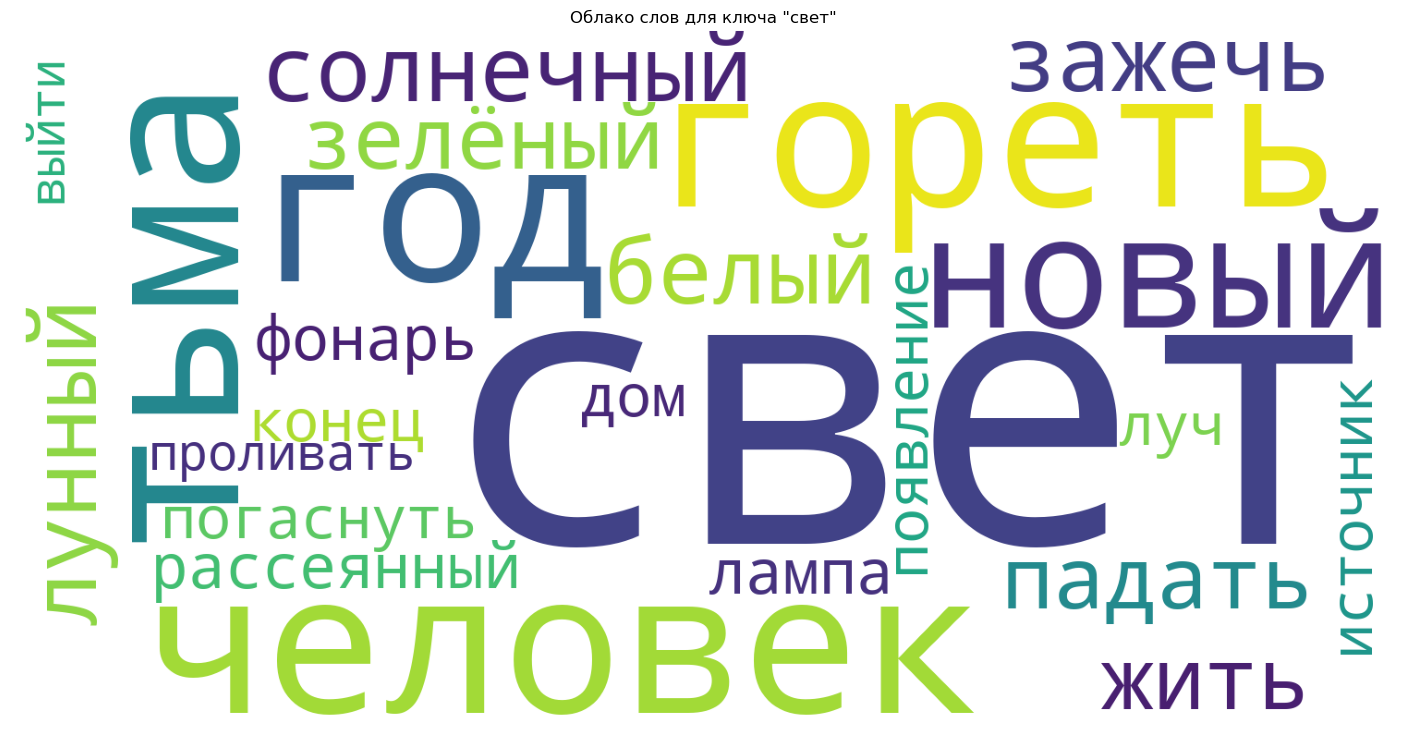

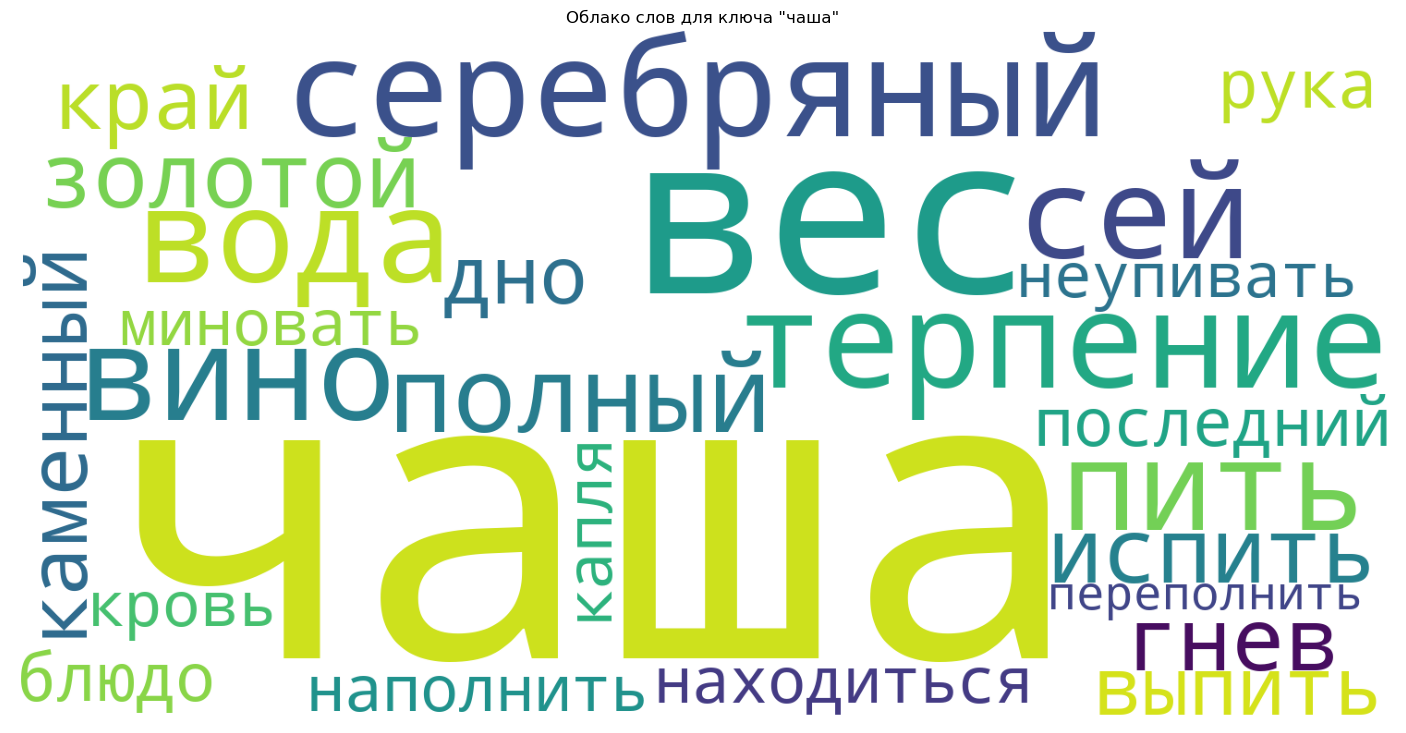

In [16]:
print_wordClouds(single_counters)

In [17]:
def show_pmi_chi2(pair_counters, single_counters, first_word_counters, second_word_counters):
    for key_word, counter in pair_counters.items():
        print(key_word, ':')
        sum_pair_counts = sum(counter.values())
        for pair, count in counter.items():
            if count >= 3:
                p_ab = count / sum_pair_counts
                a, b = pair
                sum_single_word = sum(single_counters[key_word].values())
                count_a = single_counters[key_word][a]
                count_b = single_counters[key_word][b]
                p_a = count_a / sum_single_word
                p_b = count_b / sum_single_word
                pmi = np.log(p_ab / (p_a * p_b))
                a_without_b = first_word_counters[key_word][a] - count
                b_without_a = second_word_counters[key_word][b] - count
                without_a_b_ab = sum_pair_counts - a_without_b - b_without_a - count
                frame = [
                    [count, a_without_b],
                    [b_without_a, without_a_b_ab]
                ]
                chi2, p_value, _, _ = chi2_contingency(frame)
                print(f'pmi = {pmi:.2f}, хи-квадрат = {chi2:.1f} p-value: {p_value:.2f} у пары {pair} : {count}')
        print('\n')

In [18]:
show_pmi_chi2(pair_counters, single_counters, first_word_counters, second_word_counters)

игла :
pmi = 5.72, хи-квадрат = 776.8 p-value: 0.00 у пары ('память', 'мастер') : 3
pmi = 5.72, хи-квадрат = 386.1 p-value: 0.00 у пары ('память', 'беспокойный') : 3
pmi = 5.72, хи-квадрат = 255.8 p-value: 0.00 у пары ('память', 'исколоть') : 3
pmi = 5.03, хи-квадрат = 190.7 p-value: 0.00 у пары ('память', 'память') : 3
pmi = 6.41, хи-квадрат = 747.2 p-value: 0.00 у пары ('память', 'потухать') : 6
pmi = 6.41, хи-квадрат = 581.1 p-value: 0.00 у пары ('мастер', 'беспокойный') : 3
pmi = 6.41, хи-квадрат = 385.9 p-value: 0.00 у пары ('мастер', 'исколоть') : 3
pmi = 5.72, хи-квадрат = 288.3 p-value: 0.00 у пары ('мастер', 'память') : 3
pmi = 6.41, хи-квадрат = 229.8 p-value: 0.00 у пары ('мастер', 'потухать') : 3
pmi = 6.41, хи-квадрат = 516.0 p-value: 0.00 у пары ('беспокойный', 'исколоть') : 3
pmi = 5.72, хи-квадрат = 385.9 p-value: 0.00 у пары ('беспокойный', 'память') : 3
pmi = 6.41, хи-квадрат = 307.9 p-value: 0.00 у пары ('беспокойный', 'потухать') : 3
pmi = 5.72, хи-квадрат = 581.1 p

In [19]:
labeled_df = pd.read_excel('labeled_data.xlsx').drop(columns = ['data_nkrya2'])
labeled_df = labeled_df.loc[:, 'Unnamed: 1' : 'Unnamed: 8']
labeled_df.columns = labeled_df.iloc[0].values
labeled_df = labeled_df.iloc[1:]
labeled_df.head(3)

,игла,значение «игла»,пара,значение «пара»,каток,значение «каток»,лист,значение «лист»
1,"и клали в них сломанные иглы, пустые тюрички (...",для шитья,Могу дать пару советов.,"общее указание, небольшой набор советов","принято, поэтому не улица, а каток!","метафора, скользкая дорога",Порционно выкладываем на лист салата.,часть блюда
2,"голове, будто подушечка, утыканная швейными иг...",для шитья,"На пары ходить, лекции перечитывать, готовиться к",занятия,"Тяжелый ящик, установленный на одинаковых катк...",элемент механического устройства,Перечислить всех просто не хватит листа.,бумажный
3,этих несчастных заразилось через героиновую иглу.,наркотик,"А еще ходить на пары все, и если можно понять",занятия,В воскресенье на олимпийском катке в Хамаре (Н...,ледовая площадка,Сверху положить листья эстрагона и зеленый лук.,часть блюда


In [20]:
def get_labeled_graphviz(labeled_df):
    columns = labeled_df.columns
    grouped_dfs = {}
    
    for i in range(0, len(columns), 2):
        key_word = columns[i]
        meaning_col = columns[i + 1]
    
        grouped = labeled_df.groupby(by=meaning_col)[key_word].count().reset_index(name="count")
        filtr = grouped[grouped["count"] > 30][meaning_col]
    
        filtered_df = labeled_df[labeled_df[meaning_col].isin(filtr)][[key_word, meaning_col]]
        grouped_dfs[key_word] = {label: group[[key_word]] for label, group in filtered_df.groupby(meaning_col)}
    
        for meaning, group in grouped_dfs[key_word].items():
            _, pair_counters, bigram_counters, _, _, _ = get_counters_and_pre_data(group[[key_word]])
            get_graphviz(bigram_counters, meaning, "bigram")
            get_graphviz(pair_counters, meaning, "pair")

In [21]:
get_labeled_graphviz(labeled_df)